In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
%matplotlib inline
pd.set_option('display.max_rows', None)
import scipy.stats as stats
from scipy.stats import shapiro
import copy
import statsmodels.stats.api as sms
from scipy.stats import wilcoxon
sns.set(style="darkgrid")
import test_mod as mod
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from lifelines import KaplanMeierFitter
from matplotlib.pyplot import figure

In [4]:
# Importing data

df = pd.read_csv(r"C:\Users\gdbt0\OneDrive\Documents\GitHub\Projects\cancer\data\processed\research_group.csv")

### Rectum_sig_grade analysis

In [5]:
# Assigning independent and dependent variables
indep_var = df[['followup_timing','eqd2_rectum']]
dep_var = df['rect_sig_grade']


C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


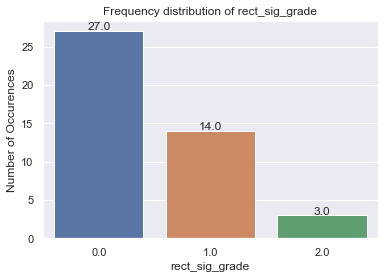

In [6]:
#Making a barplot
plot = sns.countplot(dep_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('rect_sig_grade'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('rect_sig_grade'),fontsize=12)
plt.show()

<AxesSubplot:xlabel='rect_sig_grade', ylabel='eqd2_rectum'>

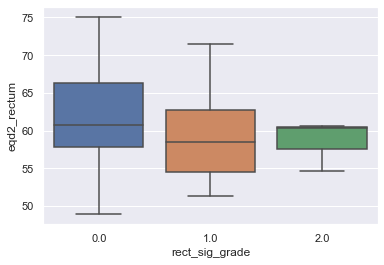

In [7]:
#Creating a boxplot between late_response_status and eqd2_total_dose
sns.boxplot(data=df,x='rect_sig_grade', y='eqd2_rectum')

In [8]:
df_bg_0_eqd2_rectum = df.loc[(df['rect_sig_grade'] == 0)]['eqd2_rectum']
df_bg_0_eqd2_rectum.head()

1    56.2
2    60.6
4    66.9
5    64.4
6    70.7
Name: eqd2_rectum, dtype: float64

In [9]:
df_bg_0_eqd2_rectum.describe()

count    27.000000
mean     62.440741
std       6.102916
min      48.900000
25%      57.800000
50%      60.800000
75%      66.350000
max      75.100000
Name: eqd2_rectum, dtype: float64

In [10]:
data = df_bg_0_eqd2_rectum
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

(60.02650756651184, 64.85497391496963)

In [11]:
df_bg_0_eqd2_rectum = df.loc[(df['rect_sig_grade'] == 1)]['eqd2_rectum']
df_bg_0_eqd2_rectum.head()

0     68.7
14    55.4
15    65.4
19    59.8
20    71.5
Name: eqd2_rectum, dtype: float64

In [12]:
df_bg_0_eqd2_rectum.describe()

count    14.000000
mean     59.292857
std       6.259696
min      51.300000
25%      54.575000
50%      58.450000
75%      62.675000
max      71.500000
Name: eqd2_rectum, dtype: float64

In [13]:
data = df_bg_0_eqd2_rectum
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))


(55.67861640521558, 62.90709788049871)

In [14]:
df_bg_0_eqd2_rectum = df.loc[(df['rect_sig_grade'] == 2)]['eqd2_rectum']
df_bg_0_eqd2_rectum.head()

3     54.7
17    60.6
18    60.3
Name: eqd2_rectum, dtype: float64

In [15]:
df_bg_0_eqd2_rectum.describe()

count     3.000000
mean     58.533333
std       3.323151
min      54.700000
25%      57.500000
50%      60.300000
75%      60.450000
max      60.600000
Name: eqd2_rectum, dtype: float64

In [16]:
data = df_bg_0_eqd2_rectum
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))

(50.27816832632864, 66.78849834033804)

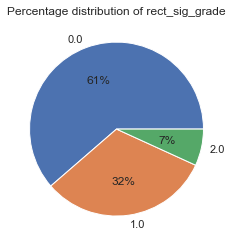

In [17]:
#Making a pie chart
rect_sig_grade_value_counts = df['rect_sig_grade'].value_counts()
plt.title("Percentage distribution of {}".format('rect_sig_grade'))
plt.pie(rect_sig_grade_value_counts, labels=rect_sig_grade_value_counts.index, autopct='%.0f%%')
plt.show()

### Logistic ordinal regression model test
#### Testing the correlation between rect_sig_grade and independent variables

In [18]:
# Logistic ordinal regression model against two variables
Y = dep_var
X = indep_var
ord_logit_model = OrderedModel(Y,X, distr='logit')
ord_logit_fit = ord_logit_model.fit(method='bfgs', disp=False)
print(ord_logit_fit.summary())

NameError: name 'OrderedModel' is not defined

In [19]:
# Logistic ordinal regression model against one variable
Y = dep_var
X = indep_var
ord_logit_model = OrderedModel(Y,X, distr='logit')
ord_logit_fit = ord_logit_model.fit(method='bfgs', disp=False)
print(ord_logit_fit.summary())

NameError: name 'OrderedModel' is not defined

### bladder_grade analysis

In [20]:
# Assigning independent and dependent variables
indep_var = df[['followup_timing','eqd2_bladder']]
dep_var = df['bladder_grade']


C:\Users\gdbt0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


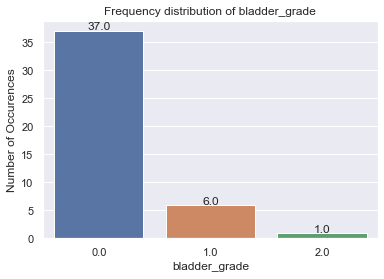

In [21]:
#Making a barplot
plot = sns.countplot(dep_var)
mod.show_values(plot)
plt.title("Frequency distribution of {}".format('bladder_grade'))
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('{}'.format('bladder_grade'),fontsize=12)
plt.show()

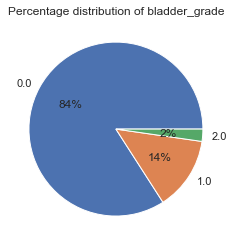

In [22]:
#Making a pie chart
bladder_grade_value_counts = df['bladder_grade'].value_counts()
plt.title("Percentage distribution of {}".format('bladder_grade'))
plt.pie(bladder_grade_value_counts, labels=bladder_grade_value_counts.index, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='bladder_grade', ylabel='eqd2_bladder'>

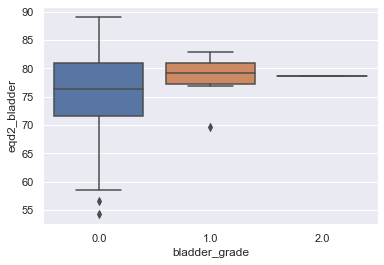

In [23]:
#Creating a boxplot between late_response_status and eqd2_total_dose
sns.boxplot(data=df,x='bladder_grade', y='eqd2_bladder')

In [24]:
df_bg_0_eqd2_bladder = df.loc[(df['bladder_grade'] == 2)]['eqd2_bladder']
df_bg_0_eqd2_bladder.head()

17    78.6
Name: eqd2_bladder, dtype: float64

In [25]:
df_bg_0_eqd2_bladder.describe()

count     1.0
mean     78.6
std       NaN
min      78.6
25%      78.6
50%      78.6
75%      78.6
max      78.6
Name: eqd2_bladder, dtype: float64

In [26]:
data = df_bg_0_eqd2_bladder
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))


C:\Users\gdbt0\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\gdbt0\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(nan, nan)

#### Testing the correlation between rect_sig_grade and independent variables


In [27]:
# Logistic ordinal regression model against two variables
Y = dep_var
X = indep_var
ord_logit_model = OrderedModel(Y,X, distr='logit')
ord_logit_fit = ord_logit_model.fit(method='bfgs', disp=False)
print(ord_logit_fit.summary())

NameError: name 'OrderedModel' is not defined

In [28]:
# Logistic ordinal regression model against one variable
indep_var = df['followup_timing']

Y = dep_var
X = indep_var
ord_logit_model = OrderedModel(Y,X, distr='logit')
ord_logit_fit = ord_logit_model.fit(method='bfgs', disp=False)
print(ord_logit_fit.summary())

NameError: name 'OrderedModel' is not defined

## Kaplan-Meier fitter diagrams
The survival function gives us the probability that the event has not occurred by duration t.

The cumulative density is the complement of the survival function and tells us the probability that the event has occurred by time t.

<AxesSubplot:xlabel='timeline'>

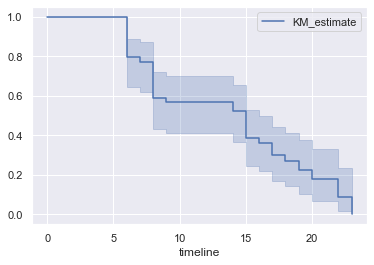

In [29]:
#Call fitter and fit with time and event data
kmf_bladder_grade_event0 = KaplanMeierFitter()
kmf_bladder_grade_event0.fit(df['followup_timing'], df['bladder_grade_event0'])

#Create survival function, cumultative density data, plot visualisations
kmf_bladder_grade_event0.survival_function_
kmf_bladder_grade_event0.cumulative_density_
kmf_bladder_grade_event0.plot_survival_function()

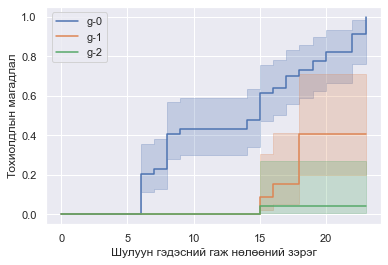

<Figure size 1600x1200 with 0 Axes>

In [38]:
#Plot cumulatative density
kmf_bladder_grade_event0.plot_cumulative_density()

#Event 1
kmf_bladder_grade_event1 = KaplanMeierFitter()
kmf_bladder_grade_event1.fit(df['followup_timing'], df['bladder_grade_event1'])
kmf_bladder_grade_event1.cumulative_density_
kmf_bladder_grade_event1.plot_cumulative_density()

#Event 2
kmf_bladder_grade_event2 = KaplanMeierFitter()
kmf_bladder_grade_event2.fit(df['followup_timing'], df['bladder_grade_event2'])
kmf_bladder_grade_event2.cumulative_density_
kmf_bladder_grade_event2.plot_cumulative_density()

plt.xlabel("Шулуун гэдэсний гаж нөлөөний зэрэг")
plt.ylabel("Тохиолдлын магадлал")
plt.legend(['g-0','g-1','g-2'])

figure(figsize=(20, 15), dpi=80)
plt.show()



Kaplan Meier cumulative estimate for rect_sig_grade events

In [ ]:
#Call fitter and fit with time and event data
rect_sig_grade_grade_event0 = KaplanMeierFitter()
rect_sig_grade_grade_event0.fit(df['followup_timing'], df['rect_sig_grade_event0'])

#Create survival function, cumultative density data, plot visualisations
rect_sig_grade_grade_event0.survival_function_
rect_sig_grade_grade_event0.cumulative_density_
rect_sig_grade_grade_event0.plot_survival_function()

In [ ]:
#Plot cumulatative density
rect_sig_grade_grade_event0.plot_cumulative_density()

#Event 1
rect_sig_grade_grade_event1 = KaplanMeierFitter()
rect_sig_grade_grade_event1.fit(df['followup_timing'], df['rect_sig_grade_event1'])
rect_sig_grade_grade_event1.cumulative_density_
rect_sig_grade_grade_event1.plot_cumulative_density()

#Event 2
rect_sig_grade_grade_event2 = KaplanMeierFitter()
rect_sig_grade_grade_event2.fit(df['followup_timing'], df['rect_sig_grade_event2'])
rect_sig_grade_grade_event2.cumulative_density_
rect_sig_grade_grade_event2.plot_cumulative_density()

plt.title("Kaplan Meier cumulative estimate for rect_sig_grade")
plt.xlabel("Follow-up timeline")
plt.ylabel("Probability of event")
plt.legend(['g-0','','g-1','','g-2',''])
plt.show()

